In [0]:
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
eps = np.finfo(float).eps
from numpy import log2 as log

In [0]:
data = pd.read_csv("/content/bank-additional-full.csv", na_values =['NA'])
columns = data.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
data = data.values
data = [items[0].split(';') for items in data]
data = pd.DataFrame(data,columns = columns)

data['job'] = data['job'].str.replace('"', '')
data['marital'] = data['marital'].str.replace('"', '')
data['education'] = data['education'].str.replace('"', '')
data['default'] = data['default'].str.replace('"', '')
data['housing'] = data['housing'].str.replace('"', '')
data['loan'] = data['loan'].str.replace('"', '')
data['contact'] = data['contact'].str.replace('"', '')
data['month'] = data['month'].str.replace('"', '')
data['day_of_week'] = data['day_of_week'].str.replace('"', '')
data['poutcome'] = data['poutcome'].str.replace('"', '')
data['y'] = data['y'].str.replace('"', '')

In [68]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [0]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [0]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)


In [72]:
data.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

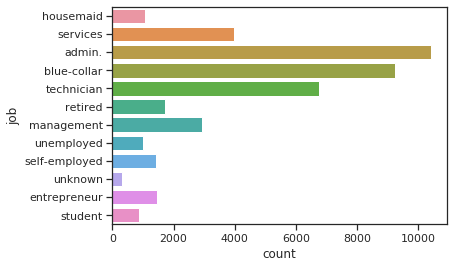

In [37]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)

In [0]:
data = data[data.job != 'unknown']

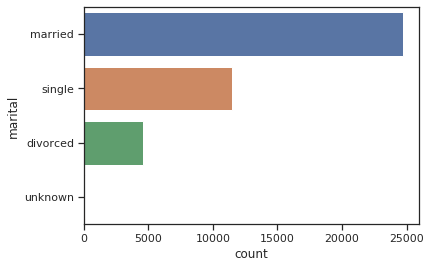

In [39]:
sns.countplot(y='marital', data=data)

In [40]:
data.marital.value_counts()

married     24694
single      11494
divorced     4599
unknown        71
Name: marital, dtype: int64

In [0]:
data = data[data.marital != 'unknown']
data = data[data.loan != 'unknown']

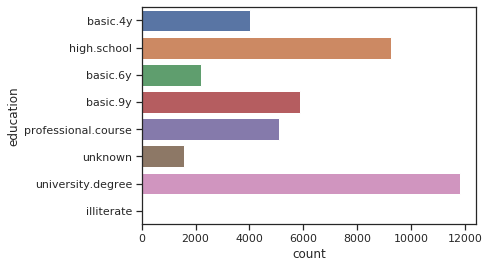

In [42]:
sns.countplot(y='education', data=data)

In [0]:
data = data[data.education != 'illiterate']

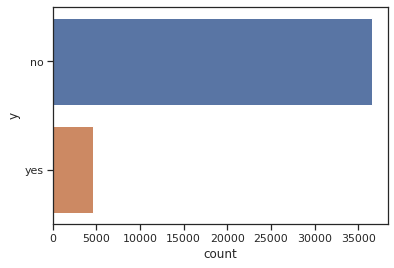

In [73]:
sns.countplot(y='y', data=data)

In [93]:
data = categorize(data)
print(data.dtypes)




age               object
job                int64
marital            int64
education          int64
default            int64
housing            int64
loan               int64
contact            int64
month              int64
day_of_week        int64
duration           int64
campaign          object
pdays             object
previous          object
poutcome           int64
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                  int64
dtype: object


In [0]:
data.describe()
data['duration']=pd.to_numeric(data['duration'])
data['age']=pd.to_numeric(data['age'])
data['campaign']=pd.to_numeric(data['campaign'])
data['previous']=pd.to_numeric(data['previous'])
data['pdays']=pd.to_numeric(data['pdays'])
data['nr.employed']=pd.to_numeric(data['nr.employed'])
data['euribor3m']=pd.to_numeric(data['euribor3m'])
data['cons.conf.idx']=pd.to_numeric(data['cons.conf.idx'])
data['cons.price.idx']=pd.to_numeric(data['cons.price.idx'])
data['emp.var.rate']=pd.to_numeric(data['emp.var.rate'])

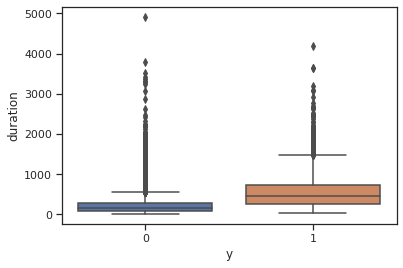

In [104]:
sns.boxplot(x='y', y='duration', data=data)

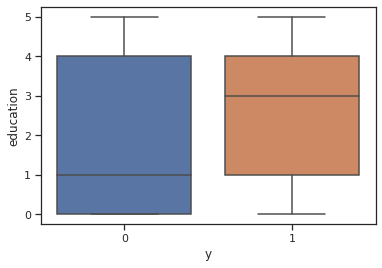

In [105]:
sns.boxplot(x='y', y='education', data=data)

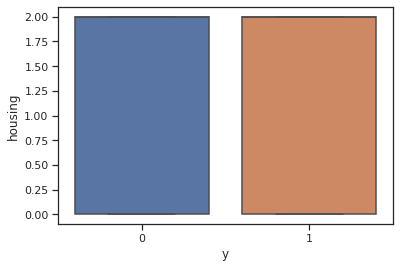

In [106]:
sns.boxplot(x='y', y='housing', data=data)

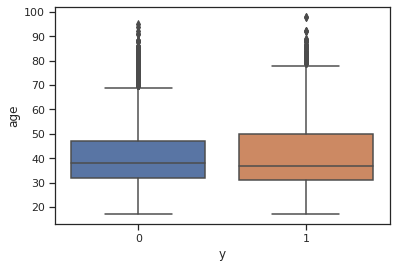

In [107]:
sns.boxplot(data['y'],data['age'])

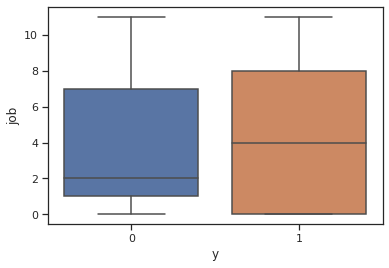

In [109]:
sns.boxplot(data['y'],data['job'])

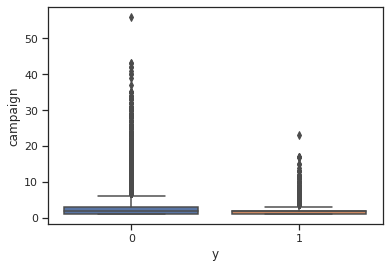

In [110]:
sns.boxplot(data['y'],data['campaign'])

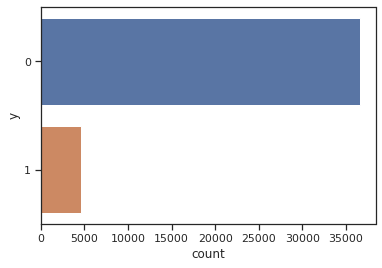

In [108]:
sns.countplot(y='y', data=data)

In [0]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [0]:
min_val = data["duration"].min()
max_val = 1500
data = remove_outliers(df=data, column='duration' , minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6

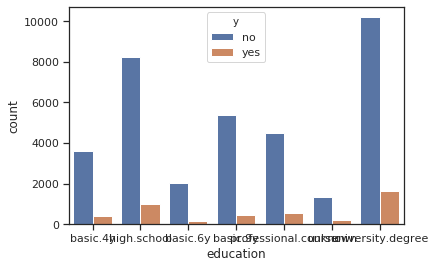

In [48]:
sns.countplot(x='education',hue='y',data=data)

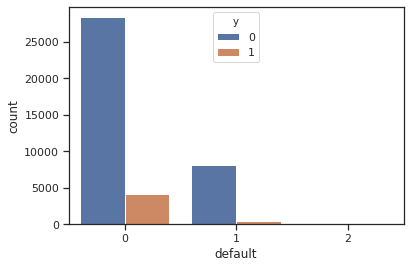

In [113]:
sns.countplot(x='default',hue='y',data=data)

In [0]:
data = data.drop('default',axis=1)

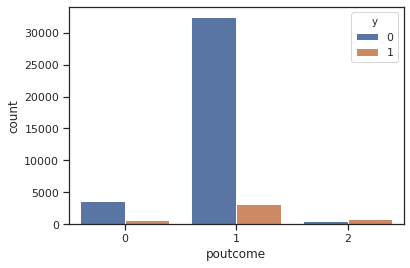

In [115]:
sns.countplot(x='poutcome',hue='y',data=data)

In [0]:
data = data.drop('poutcome',axis=1)

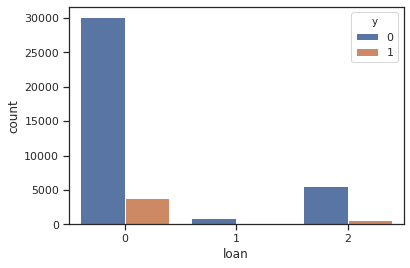

In [117]:
sns.countplot(x='loan',hue='y',data=data)

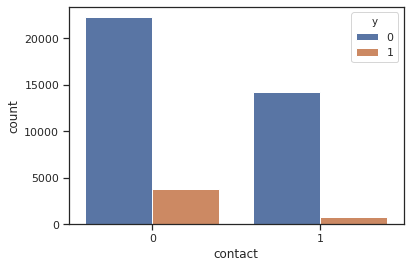

In [118]:
sns.countplot(x='contact',hue='y',data=data)

In [0]:
data = data.drop('contact',axis=1)

In [0]:
data = data.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
age            41188 non-null float64
job            41188 non-null int64
marital        41188 non-null int64
education      41188 non-null int64
housing        41188 non-null int64
loan           41188 non-null int64
month          41188 non-null int64
day_of_week    41188 non-null int64
duration       41188 non-null float64
campaign       41188 non-null int64
pdays          41188 non-null int64
previous       41188 non-null int64
y              41188 non-null int64
dtypes: float64(2), int64(11)
memory usage: 4.1 MB


In [126]:
data.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,y
0,56.0,3,1,0,0,0,6,1,261.0,1,999,0,0
1,57.0,7,1,1,0,0,6,1,149.0,1,999,0,0
2,37.0,7,1,1,2,0,6,1,226.0,1,999,0,0
3,40.0,0,1,0,0,0,6,1,151.0,1,999,0,0
4,56.0,7,1,1,0,2,6,1,307.0,1,999,0,0


In [0]:
train, test = train_test_split(data, test_size=0.2)

In [123]:
entropy_node = 0  
values = data['y'].unique()  
for value in values:
    fraction = data['y'].value_counts()[value]/len(data['y'])  
    entropy_node += -fraction*np.log2(fraction)
print(entropy_node)

0.507870194516452


In [0]:
def find_entropy(df):
    Class = df.keys()[-1]   
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]  
  target_variables = df[Class].unique()  
  variables = df[attribute].unique()   
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:

        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
  
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]   
    
    
    node = find_winner(df)
    
   
    attValue = np.unique(df[node])
    
    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
  

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['y'],return_counts=True)                        
        
        if len(counts)==1:
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) 
                   
    return tree
  
  


In [0]:
tree=buildTree(train)

In [129]:
import pprint
pprint.pprint(tree)

Streaming output truncated to the last 5000 lines.
                              52.0: 0,
                              53.0: 0,
                              56.0: 0,
                              57.0: 0,
                              58.0: 0,
                              62.0: 1}},
              330.0: {'age': {25.0: 0,
                              28.0: 0,
                              29.0: {'job': {0: 1, 1: 0}},
                              30.0: 0,
                              31.0: 0,
                              32.0: 0,
                              33.0: 0,
                              35.0: 0,
                              36.0: 1,
                              43.0: 0,
                              44.0: 0,
                              45.0: 0,
                              46.0: 0,
                              47.0: 0,
                              48.0: 0,
                              49.0: 0,
                              55.0: 0,
                              

In [0]:
def predict(inst,tree):
    wrong=0
    for nodes in tree.keys():        
        
        value = inst[nodes]
       
       
        tree = tree[nodes][value]
        
        prediction = 0
            
        if type(tree) is dict:
            prediction = predict(inst, tree)
        else:
            prediction = tree
            break;                            
  
    return prediction

In [153]:
#testing

inst=test.iloc[7,:]


prediction=predict(inst,tree)
print(int(inst['y']))
print(prediction)



0
0
